# **Elective 3**
# Diabetes Dataset - Pima Indians

### Sunmitted by: Abdallah Fekry Mohammed
### Submitted to: Dr. Omaima Goher
---

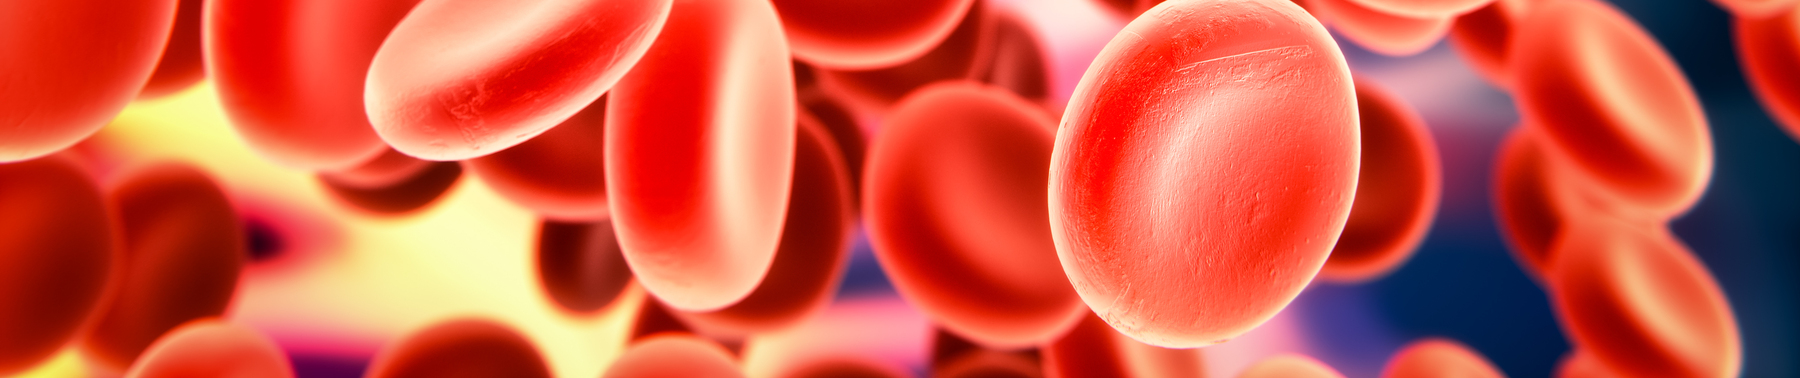

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from time import process_time

In [8]:
ds = pd.read_csv("/kaggle/input/review/diabetes.csv")
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
ds.iloc[0,:]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [10]:
labels = {0:'Healthy', 1:'Sick'}
labels[0]

'Healthy'

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
x = ds.iloc[:,:-1]
y = ds.iloc[:,-1]
print("x shape:",x.shape,"\ny shape:",y.shape)

x shape: (768, 8) 
y shape: (768,)


In [22]:
(ds==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [23]:
(x==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [25]:
indexes = x.iloc[:,0][x.iloc[:,0]==0].index
x.iloc[indexes,0]

4      0
16     0
45     0
57     0
58     0
      ..
713    0
727    0
736    0
753    0
757    0
Name: Pregnancies, Length: 111, dtype: int64

## remove zero values and substiute with the average

In [28]:
for i in range(8):
    indexes = x.iloc[:,i][x.iloc[:,i]==0].index
    x.iloc[indexes,i] = x.iloc[:,i].mean()

In [29]:
(x==0).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [46]:
x = x.values
y = y.values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,train_size=0.8,
                                                    random_state=13)
print("x train shape:",x_train.shape,"\ny train shape:",y_train.shape,
      "\nx test shape:",x_test.shape,"\ny test shape:",y_test.shape)

x train shape: (614, 8) 
y train shape: (614,) 
x test shape: (154, 8) 
y test shape: (154,)


# **1) Logistic Regression**

In [31]:
# 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t1 = end-st
yp = model.predict(x_test)
score1 = accuracy_score(y_test,yp)
print("By using Logistic Regression\n\n",
      "Test Accuracy: ",round(score1*100,2),' %',
      "\nfitting time: ",round(t1,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Logistic Regression

Test Accuracy: 74.03 %
fitting time: 0.029 second

Confusion Matrix
[[85 12]
 [28 29]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Heatmap

<Axes: title={'center': 'Logistic Regression Heatmap'}, xlabel='Predicted', ylabel='Actual'>

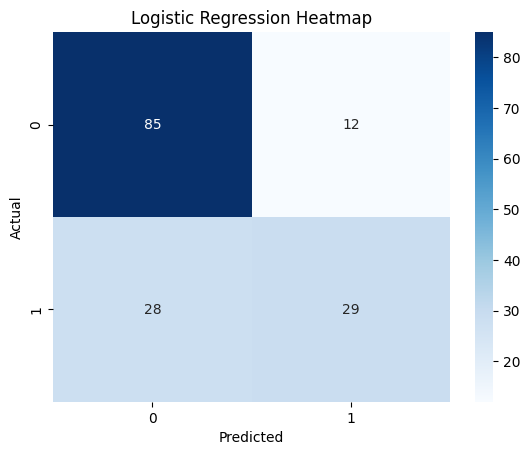

In [32]:
fig = plt.figure()
plt.title("Logistic Regression Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

# **2) Support Vector Machine SVM**

In [33]:
# 2 Support Vector Machine SVM
from sklearn import svm
model = svm.SVC()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
print("By using Support Vector Machine SVM\n\n",
      "Accuracy: ",round(score2*100,2),' %',
      "\nfitting time: ",round(t2,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Support Vector Machine SVM

Accuracy: 74.68 %
fitting time: 0.0202 second

Confusion Matrix
[[89  8]
 [31 26]]


### Heatmap

<Axes: title={'center': 'SVM Heatmap'}, xlabel='Predicted', ylabel='Actual'>

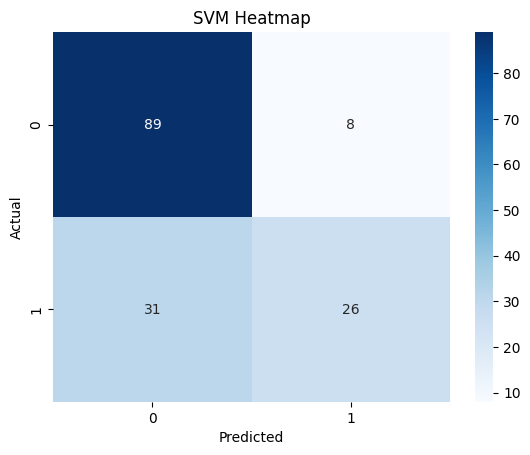

In [34]:
fig = plt.figure()
plt.title("SVM Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

# **3) Random Forest**

In [153]:
# 2 Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
print("By using Random Forest\n\n",
      "Accuracy: ",round(score2*100,2),' %',
      "\nfitting time: ",round(t2,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Random Forest

Accuracy: 79.22 %
fitting time: 0.3055 second

Confusion Matrix
[[87 10]
 [22 35]]


### Heatmap

<Axes: title={'center': 'Random Forest Heatmap'}, xlabel='Predicted', ylabel='Actual'>

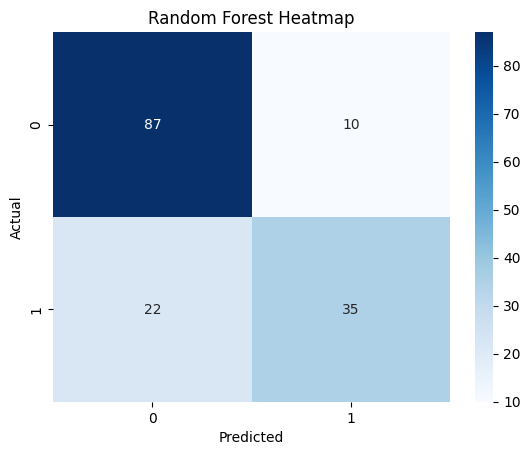

In [154]:
fig = plt.figure()
plt.title("Random Forest Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

# **4) K Nearest Neighbors - KNN**

In [103]:
# 2 K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
print("By using K Nearest Neighbors\n\n",
      "Accuracy: ",round(score2*100,2),' %',
      "\nfitting time: ",round(t2,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using K Nearest Neighbors

Accuracy: 69.48 %
fitting time: 0.0055 second

Confusion Matrix
[[79 18]
 [29 28]]


In [114]:
# 2 Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
st = process_time()
model.fit(x_train , y_train)
rf = model
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
print("By using Random Forest\n\n",
      "Accuracy: ",round(score2*100,2),' %',
      "\nfitting time: ",round(t2,4),' second'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Random Forest

Accuracy: 76.62 %
fitting time: 0.3099 second

Confusion Matrix
[[87 10]
 [26 31]]


### Classification Report

In [155]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        97
           1       0.78      0.61      0.69        57

    accuracy                           0.79       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



---

## by using deep learning

In [170]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
x_train.shape

(614, 8)

In [58]:
y_train.shape

(614,)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=64
from tensorflow import keras
results = model.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test),
                  steps_per_epoch=len(x_train), validation_steps=len(x_test),
                  callbacks=keras.callbacks.EarlyStopping(patience=10,monitor='val_accuracy' ,restore_best_weights=True)
                  )

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6489 - loss: 2.8629 - val_accuracy: 0.6299 - val_loss: 0.9918
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 42us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6362 - loss: 1.0756 - val_accuracy: 0.6688 - val_loss: 0.7106
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 0.7482 - val_accuracy: 0.6623 - val_loss: 0.9178
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6635 - loss: 0.7709 - val_accuracy: 0.6558 - val_loss: 1.0049
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7025 - loss: 0.6919 - val_accuracy: 0.6364 - val_loss: 1.1424
Epoch 10/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - a

In [95]:
results2 = model.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test),
                  steps_per_epoch=len(x_train), validation_steps=len(x_test),
                  callbacks=keras.callbacks.EarlyStopping(patience=10,monitor='val_accuracy' ,restore_best_weights=True)
                  )

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6307 - loss: 0.9462 - val_accuracy: 0.6429 - val_loss: 1.4712
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6120 - loss: 0.9641 - val_accuracy: 0.6429 - val_loss: 0.9166
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6700 - loss: 0.7869 - val_accuracy: 0.6948 - val_loss: 0.7675
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6538 - loss: 0.9179 - val_accuracy: 0.6364 - val_loss: 1.1986
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [96]:
results3 = model.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test),
                  steps_per_epoch=len(x_train), validation_steps=len(x_test),
                  callbacks=keras.callbacks.EarlyStopping(patience=20,monitor='val_accuracy' ,restore_best_weights=True)
                  )

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6869 - loss: 0.7374 - val_accuracy: 0.6429 - val_loss: 0.7484
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6683 - loss: 0.8426 - val_accuracy: 0.6753 - val_loss: 0.7296
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6830 - loss: 0.8008 - val_accuracy: 0.6883 - val_loss: 0.6521
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6469 - loss: 0.8548 - val_accuracy: 0.6558 - val_loss: 0.6796
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [97]:
results4 = model.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test),
                  steps_per_epoch=len(x_train), validation_steps=len(x_test),
                  callbacks=keras.callbacks.EarlyStopping(patience=20,monitor='val_accuracy' ,restore_best_weights=True)
                  )

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6810 - loss: 0.7902 - val_accuracy: 0.6688 - val_loss: 0.6858
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6792 - loss: 0.6805 - val_accuracy: 0.6883 - val_loss: 0.5867
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7017 - loss: 0.6388 - val_accuracy: 0.6883 - val_loss: 0.6006
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7171 - loss: 0.6236 - val_accuracy: 0.6948 - val_loss: 0.6349
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 

---

### The best model is Random forest with 79% test accuracy

## Random Running from X test

In [166]:
import random
n = random.randint(0,len(x_test)-1)
x1 = x_test[n]
yt = y_test[n]
p1 = rf.predict(x1.reshape(1,-1))[0]
p2 = labels[p1]
print(f"-> at index number {n}\n\n",
      f"- Actual value: {yt}\n",
      f"- Predicted value: {p1}, {p2}", sep='', end='\n\n')


-> at index number 10

- Actual value: 0
- Predicted value: 0, Healthy

